# Домашняя работа №1

**Срок сдачи:** 30 сентября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем формате: <br\>
** [ИАД] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Домашняя-работа-№1-1" href="#Домашняя-работа-№1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашняя работа №1</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Регрессия-с-SVM-(3-балла)-2" href="#Регрессия-с-SVM-(3-балла)"><span class="toc-item-num">2&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Визуализация-данных-(1-балл)-2.1" href="#Визуализация-данных-(1-балл)"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Обучение-моделей-(2-балла)-2.2" href="#Обучение-моделей-(2-балла)"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Определение-языка-слова-(7-баллов)-3" href="#Определение-языка-слова-(7-баллов)"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Загрузка-(1-балл)-3.1" href="#Загрузка-(1-балл)"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Подготовка-данных-(2-балла)-3.2" href="#Подготовка-данных-(2-балла)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных (2 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Расчет-ядра-(3-балла)-3.3" href="#Расчет-ядра-(3-балла)"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет ядра (3 балла)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Оценка-качества-(1-балл)-3.4" href="#Оценка-качества-(1-балл)"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных и выведите их на графике.

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv('titanium.csv')
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [3]:
y = data['y']
X = data.drop('y', axis=1)

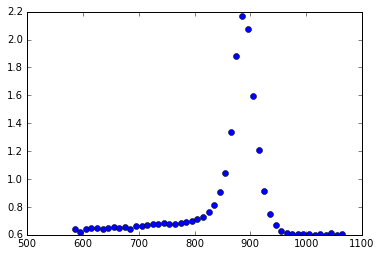

In [4]:
plt.plot(X, y,'bo')

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data.x = MinMaxScaler().fit_transform(X)
#data.y = MinMaxScaler().fit_transform(y)
data.head()

,x,y
0,0.000000,0.027423
1,0.020833,0.013393
2,0.041667,0.023597
3,0.062500,0.030612
4,0.083333,0.032526


## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [23]:
from sklearn.svm import SVR

# Первый способ

Построим линейное ядро:

In [24]:
X1 = data.x.reshape(-1, 1)
y1 = data.y

('CV error : ', 19.103940644343961)
('Best C : ', 0.001)


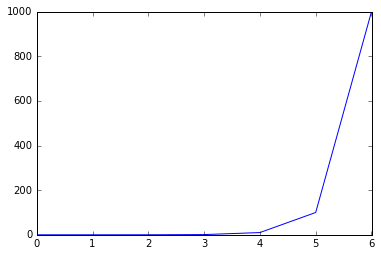

In [26]:
from sklearn.grid_search import GridSearchCV

C_array = np.logspace(-3, 3, num=7)
svr = SVR(kernel='linear')
gridsearch = GridSearchCV(svr, param_grid={'C': C_array})
gridsearch.fit( X1, y1)

print ('CV error : ', 1 - gridsearch.best_score_)
print ('Best C : ', gridsearch.best_estimator_.C)

plt.plot(C_array)

# Второй способ

Сначала разобьем выборку на обучающую и отложенную(тестовую) в пропорции 80/20 :

In [27]:
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=12)

### Для линейного ядра:

Зададим функцию, вычисляющую оптимальное значение С и среднюю абсолютную ошибку:

In [29]:
def best_c(svm, c_values):
    error = []
    for c in c_values:
        svr = SVR(kernel=svm,C=c,epsilon=0.01)
        y_s=svr.fit(X_train, y_train)
        error.append(abs(cross_val_score(y_s, X1, y1, scoring='mean_absolute_error').mean()))

    plt.plot(np.log(c_values), error)
    print('Best C:', c_values[error.index(np.min(error))],'error (MAE) :',np.min(error))

('Best C:', 0.001, 'error (MAE) :', 0.12879200519863518)


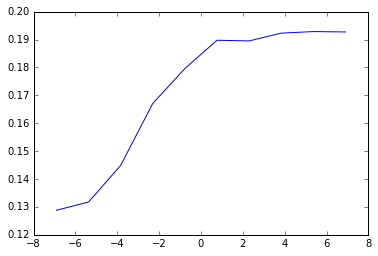

In [39]:
best_c('linear', np.logspace(-3, 3, num=10))

Наилучшее значение С = 0.001

Для наилучшего параметра C построим график с данными и предсказанием с помощью SVM:

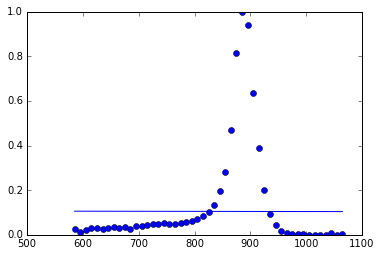

In [42]:
p = SVR(kernel='linear', C=0.001).fit(X1, y1).predict(X1)
plt.plot(X, p)
plt.plot(X, y,'bo')

Предсказание с линейным ядром показывает общий уровень, однако не может учесть очобенности динамики данных.

### Для полиномиального:

In [31]:
def best_c(svm, c_values):
    error = []
    for c in c_values:
        svr = SVR(kernel=svm,C=c,epsilon=0.01, degree = 3, gamma = 6, coef0 = 1)
        y_s=svr.fit(X_train, y_train)
        error.append(abs(cross_val_score(y_s, X1, y1, scoring='mean_absolute_error').mean()))

    plt.plot(np.log(c_values), error)
    print('Best C:', c_values[error.index(np.min(error))],'error (MAE) :',np.min(error))

('Best C:', 0.001, 'error (MAE) :', 0.2173354069235641)


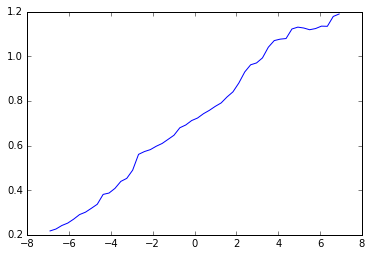

In [38]:
best_c('poly', np.logspace(-3, 3, num=50))

Наилучшее С = 0.001

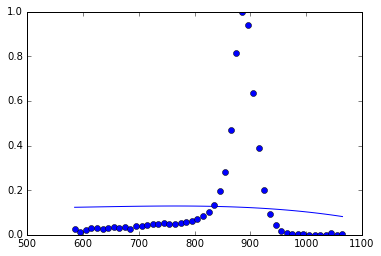

In [43]:
n = SVR(kernel='poly', C=0.001,degree = 3, gamma = 6, coef0 = 1).fit(X1, y1).predict(X1)
plt.plot(X, n)
plt.plot(X, y,'bo')

Результат похож на результат предсказания с линейным ядром. Так же как и линейное, учитывает общую динамику большого количества данных, однако не учитывает значительный "всплеск"  

### Для RBF:

In [33]:
def best_c(svm, c_values):
    error = []
    for c in c_values:
        svr = SVR(kernel=svm,C=c,epsilon=0.01, gamma = 6, coef0 = 1)
        y_s=svr.fit(X_train, y_train)
        error.append(abs(cross_val_score(y_s, X1, y1, scoring='mean_absolute_error').mean()))

    plt.plot(np.log(c_values), error)
    print('Best C:', c_values[error.index(np.min(error))],'error (MAE) :',np.min(error))

('Best C:', 0.0054286754393238594, 'error (MAE) :', 0.12735352799990091)


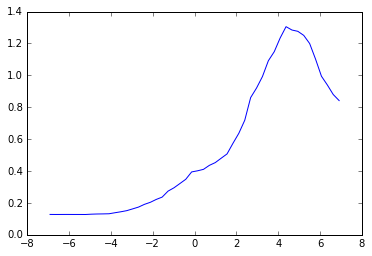

In [37]:
best_c('rbf', np.logspace(-3, 3, num=50))

Наилучшее С = 0.005

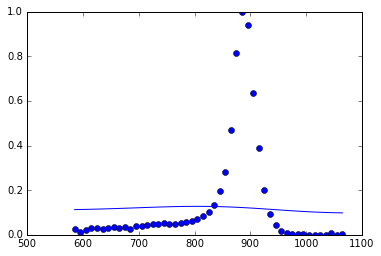

In [45]:
m = SVR(kernel='rbf', C=0.005,gamma = 6, coef0 = 1).fit(X1, y1).predict(X1)
plt.plot(X, m)
plt.plot(X, y,'bo')

Вывод аналогичный предыдущим предсказаниям

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [47]:
data_en = pd.read_csv('war_and_peace_en.txt', names = ['word'])
data_en['label'] = 0
data_es = pd.read_csv('war_and_peace_es.txt', names = ['word'])
data_es['label'] = 1
df = data_en.append(data_es, ignore_index = True)
df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [46]:
from sklearn.cross_validation import train_test_split

Случайным образом перемешиваем и заново индексируем таблицу:

In [48]:
RND_SEED = 12
df = df.sample(len(df), replace=True, random_state=RND_SEED)
df = df.reset_index()
df.head()

,index,word,label
0,5787,che,1
1,9606,specie,1
2,3325,moment,0
3,7409,come,1
4,3714,who,0


Урезаем таблицу:

In [49]:
df1 = df[:1001]

Разбиваем на обучающую и контрольную выборки:

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df1.word, df1.label, test_size = (int(len(df1.word)*0.4)), train_size = (int(len(df1.word)*0.6)), random_state=RND_SEED)

## Расчет ядра (3 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


Расчет матрицы ядра:

In [51]:
def string_kernel(U,V,K):
    gram_matrix = np.zeros((U.shape[0], V.shape[0]))
    for i, x in enumerate(U):
        for j, y in enumerate(V):
            gram_matrix[i, j] = K(x, y)
    return gram_matrix

Функция, реализующую расчет ядра (результат обратный расстоянию Левенштейна):

In [52]:
def exp_levenshtein(string_1, string_2):
    len_1 = len(string_1) + 1
    len_2 = len(string_2) + 1

    d = [0] * (len_1 * len_2)

    for i in range(len_1):
        d[i] = i
    for j in range(len_2):
        d[j * len_1] = j

    for j in range(1, len_2):
        for i in range(1, len_1):
            if string_1[i - 1] == string_2[j - 1]:
                d[i + j * len_1] = d[i - 1 + (j - 1) * len_1]
            else:
                d[i + j * len_1] = min(
                   d[i - 1 + j * len_1] + 1,        
                   d[i + (j - 1) * len_1] + 1,      
                   d[i - 1 + (j - 1) * len_1] + 1,  
                )

    return np.exp(-d[-1])

In [53]:
from functools import partial
correct_kernel = partial(string_kernel, K=exp_levenshtein)

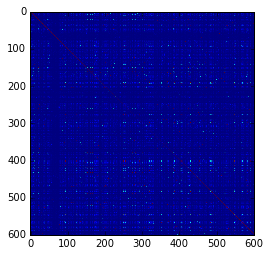

In [54]:
plt.imshow(correct_kernel(X_train,X_train))

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Уменьшим размер выборки (для сокращения времени подсчета)

In [60]:
df2=df[:200]
X_train, X_test, y_train, y_test = train_test_split(df2.index.values, df2.label, test_size = (int(len(df2.word)*0.4)), train_size = (int(len(df2.word)*0.6)), random_state=RND_SEED)
X_train1=X_train.reshape(-1,1)
X_test1=X_test.reshape(-1,1)

In [61]:
svc = SVC(kernel=correct_kernel, C = 1)
m = svc.fit(X_train1, y_train).predict(X_test1)
m1 = svc.fit(X_train1, y_train).predict(X_train1)
print ("Test",accuracy_score(y_test, m))
print("Train:",accuracy_score(y_train, m1))

('Test', 0.4375)
('Train:', 1.0)


In [62]:
svc = SVC(kernel=correct_kernel, C = 0.1)
m = svc.fit(X_train1, y_train).predict(X_test1)
m1 = svc.fit(X_train1, y_train).predict(X_train1)
print ("Test",accuracy_score(y_test, m))
print("Train:",accuracy_score(y_train, m1))

('Test', 0.4375)
('Train:', 0.53333333333333333)


In [63]:
svc = SVC(kernel=correct_kernel, C = 10)
m = svc.fit(X_train1, y_train).predict(X_test1)
m1 = svc.fit(X_train1, y_train).predict(X_train1)
print ("Test",accuracy_score(y_test, m))
print("Train:",accuracy_score(y_train, m1))

('Test', 0.4375)
('Train:', 1.0)


In [65]:
svc = SVC(kernel=correct_kernel, C = 1000)
m = svc.fit(X_train1, y_train).predict(X_test1)
m1 = svc.fit(X_train1, y_train).predict(X_train1)
print ("Test",accuracy_score(y_test, m))
print("Train:",accuracy_score(y_train, m1))

('Test', 0.4375)
('Train:', 1.0)
